<a href="https://colab.research.google.com/github/ViniciusKanh/AIS-DefectDetector/blob/main/AIS_DefectDetector_CIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mealpy

# Algoritmo AIS para Detecção de Defeitos de Software

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# === 1. Carregamento e pré-processamento do dataset ===
url = "https://raw.githubusercontent.com/ApoorvaKrisna/NASA-promise-dataset-repository/main/jm1.csv"
df = pd.read_csv(url)

# Ajustar nome correto da coluna alvo (pode variar)
if 'defects' not in df.columns:
    df.columns = [c.lower() for c in df.columns]
X = df.drop(columns=['defects'])
y = df['defects']

# Normalização
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Separar conjuntos
X_ok = X_scaled[y == 0].reset_index(drop=True)      # Antígenos saudáveis
X_bug = X_scaled[y == 1].reset_index(drop=True)     # Antígenos defeituosos


## 🔬 2. Funções do Sistema Imunológico Artificial

In [ ]:
# Calcula a afinidade (distância euclidiana inversa)
def afinidade(a, b):
    return 1.0 / (1e-5 + np.linalg.norm(a - b))

# Clonagem proporcional à afinidade (mais afinidade = mais clones)
def clonar(anticorpo, afinidade_val, beta=5):
    n_clones = int(beta * afinidade_val)
    clones = [anticorpo.copy() for _ in range(n_clones)]
    return clones

# Mutação leve nos clones (diferenciação clonal)
def mutar(clone, taxa=0.1):
    gene = np.random.choice(clone.index)
    clone[gene] = np.clip(clone[gene] + np.random.normal(0, taxa), 0, 1)
    return clone


## 🧪 3. Loop Evolutivo (Ciclo Imunológico Artificial)

In [ ]:
# Inicialização da população de anticorpos
pop_tam = 30
anticorpos = [X_ok.sample(1).iloc[0] for _ in range(pop_tam)]

# Histórico de F1-score
historico_f1 = []

# Rodadas de evolução
geracoes = 10
for g in range(geracoes):
    clones_todos = []

    # Para cada anticorpo, calcular afinidade e clonar/mutar
    for ant in anticorpos:
        afinidades = [afinidade(ant.values, bug.values) for _, bug in X_bug.iterrows()]
        afin_media = np.mean(afinidades)
        clones = clonar(ant, afin_media)
        clones_mutados = [mutar(c.copy()) for c in clones]
        clones_todos.extend(clones_mutados)

    # Avaliar todos os clones como detectores (classificação)
    X_total = pd.concat([X_ok, pd.DataFrame(clones_todos)], ignore_index=True)
    y_total = pd.Series([0] * len(X_ok) + [1] * len(clones_todos))

    X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.3, stratify=y_total)

    modelo = RandomForestClassifier()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    historico_f1.append(f1)

    # Seleção dos melhores anticorpos (elitismo)
    anticorpos = sorted(clones_todos, key=lambda c: -np.mean([afinidade(c.values, b.values) for _, b in X_bug.iterrows()]))[:pop_tam]
    print(f"Geração {g+1}: F1 = {f1:.4f}")


Geração 1: F1 = 0.9035
Geração 2: F1 = 0.9962
Geração 3: F1 = 0.9930
Geração 4: F1 = 0.9946
Geração 5: F1 = 0.9970
Geração 6: F1 = 0.9987
Geração 7: F1 = 0.9981
Geração 8: F1 = 0.9981
Geração 9: F1 = 0.9984
Geração 10: F1 = 0.9987


## 📈 4. Visualização da Evolução da Aptidão

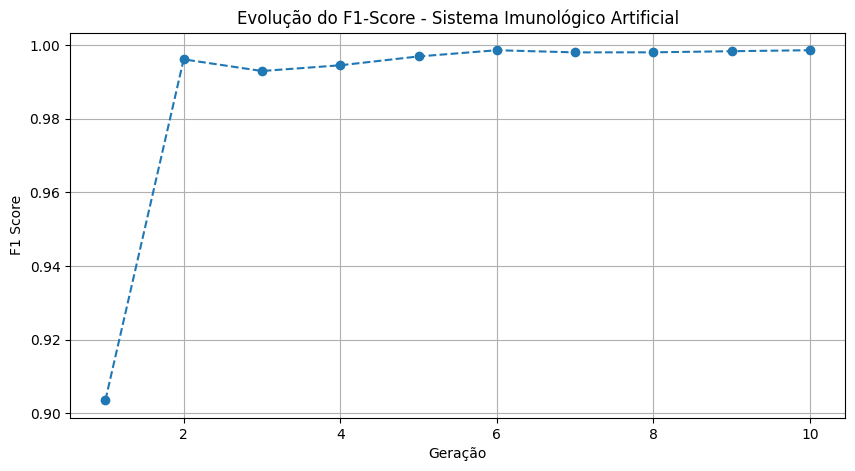

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, geracoes+1), historico_f1, marker='o', linestyle='--')
plt.title("Evolução do F1-Score - Sistema Imunológico Artificial")
plt.xlabel("Geração")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


## AIS 2.0 Turbo

Geração 1: F1-Score (Validação) = 0.3117
Geração 2: F1-Score (Validação) = 0.2993
Geração 3: F1-Score (Validação) = 0.3082
Geração 4: F1-Score (Validação) = 0.3088
Geração 5: F1-Score (Validação) = 0.2883
Geração 6: F1-Score (Validação) = 0.3229
Geração 7: F1-Score (Validação) = 0.3025
Geração 8: F1-Score (Validação) = 0.3165
Geração 9: F1-Score (Validação) = 0.3080
Geração 10: F1-Score (Validação) = 0.2993
Geração 11: F1-Score (Validação) = 0.3039
Geração 12: F1-Score (Validação) = 0.3063
Geração 13: F1-Score (Validação) = 0.3134
Geração 14: F1-Score (Validação) = 0.3206
Geração 15: F1-Score (Validação) = 0.3147
Geração 16: F1-Score (Validação) = 0.3023
Geração 17: F1-Score (Validação) = 0.3088
Geração 18: F1-Score (Validação) = 0.2982
Geração 19: F1-Score (Validação) = 0.3128
Geração 20: F1-Score (Validação) = 0.3085
Geração 21: F1-Score (Validação) = 0.3187
Geração 22: F1-Score (Validação) = 0.2993
Geração 23: F1-Score (Validação) = 0.2892
Geração 24: F1-Score (Validação) = 0.3123
G

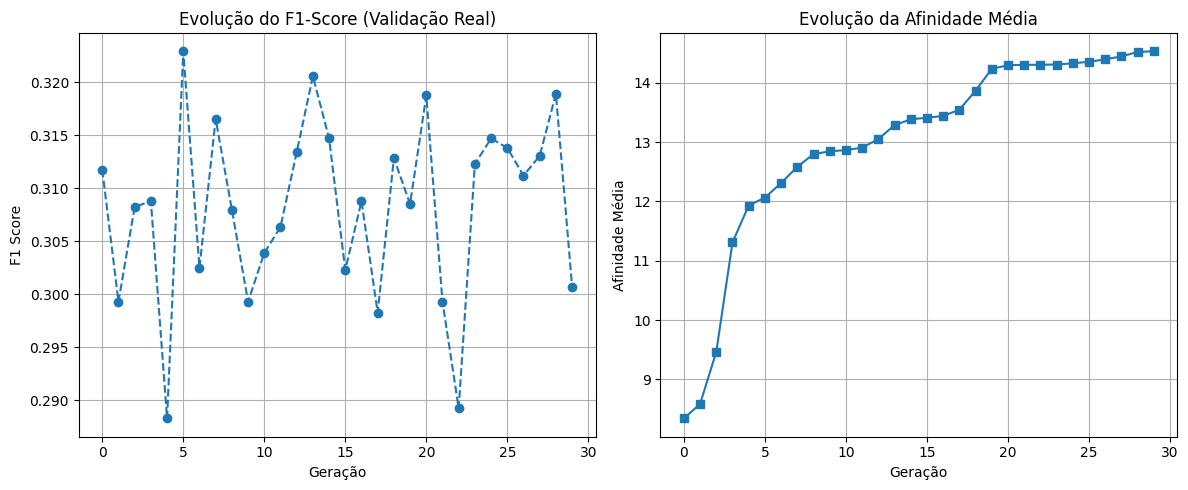


🔹 Baseline Random Forest (Treino em dados reais):
Acurácia: 0.8492
F1-Score: 0.2971
Recall: 0.2000
Precisão: 0.5771


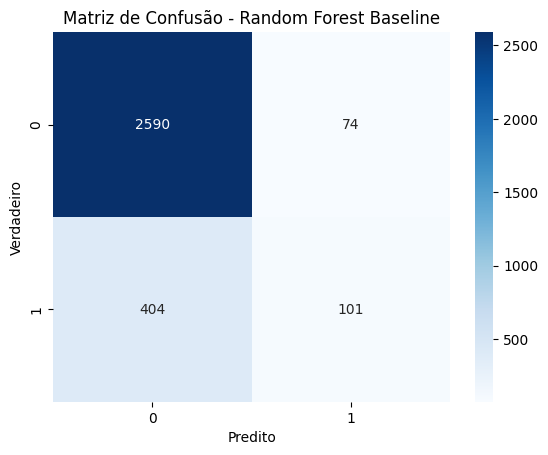

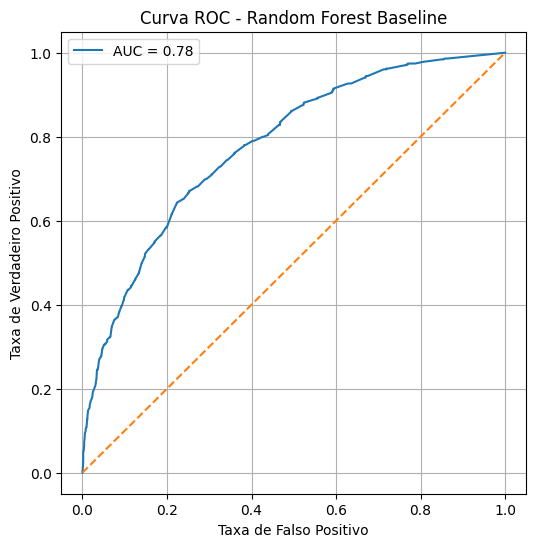

In [ ]:
# 📥 Imports Necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
import joblib
import random

# 📌 Semente para reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# 📚 Carregamento do Dataset
url = "https://raw.githubusercontent.com/ApoorvaKrisna/NASA-promise-dataset-repository/main/jm1.csv"
df = pd.read_csv(url)
if 'defects' not in df.columns:
    df.columns = [c.lower() for c in df.columns]
X = df.drop(columns=['defects'])
y = df['defects']

# 🔄 Normalização
df_normalizado = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

# 📊 Separar dados para evolução e validação
X_evolucao, X_validacao, y_evolucao, y_validacao = train_test_split(df_normalizado, y, test_size=0.2, stratify=y, random_state=SEED)
X_ok = X_evolucao[y_evolucao == 0].reset_index(drop=True)
X_bug = X_evolucao[y_evolucao == 1].reset_index(drop=True)

# 🔬 Funções AIS

def afinidade(a, b):
    return 1.0 / (1e-5 + np.linalg.norm(a - b))

def clonar(anticorpo, afinidade_val, beta=10, max_clones=10):
    n_clones = min(max(1, int(beta * afinidade_val)), max_clones)
    clones = [anticorpo.copy() for _ in range(n_clones)]
    return clones

def mutar(clone, taxa=0.5):
    gene = np.random.choice(clone.index)
    clone[gene] = np.clip(clone[gene] + np.random.normal(0, taxa), 0, 1)
    return clone

# 🧬 Função principal de Evolução AIS com elitismo
def evoluir_AIS(X_ok, X_bug, X_val, y_val, pop_tam=50, beta=10, taxa_mutacao=0.5, geracoes=30, salvar_modelo=True):
    anticorpos = [X_ok.sample(1, random_state=SEED).iloc[0] for _ in range(pop_tam)]
    historico_f1 = []
    historico_afinidade = []

    for g in range(geracoes):
        clones_todos = []
        afinidade_medias = []

        for ant in anticorpos:
            afinidades = [afinidade(ant.values, bug.values) for _, bug in X_bug.iterrows()]
            afin_media = np.mean(afinidades)
            afinidade_medias.append(afin_media)
            clones = clonar(ant, afin_media, beta)
            clones_mutados = [mutar(c.copy(), taxa_mutacao) for c in clones]
            clones_todos.extend(clones_mutados)

        # Treinamento usando clones + bugs reais
        X_total = pd.concat([X_ok, X_bug, pd.DataFrame(clones_todos)], ignore_index=True)
        y_total = pd.Series([0] * len(X_ok) + [1] * len(X_bug) + [1] * len(clones_todos))

        modelo = RandomForestClassifier(random_state=SEED)
        modelo.fit(X_total, y_total)

        # Avaliação usando validação real
        y_pred_val = modelo.predict(X_val)
        f1 = f1_score(y_val, y_pred_val)
        historico_f1.append(f1)
        historico_afinidade.append(np.mean(afinidade_medias))

        # Elitismo: preservar top 10% dos anticorpos
        num_elitismo = max(1, pop_tam // 10)
        elite = sorted(anticorpos, key=lambda c: -np.mean([afinidade(c.values, b.values) for _, b in X_bug.iterrows()]))[:num_elitismo]

        novos_anticorpos = sorted(clones_todos, key=lambda c: -np.mean([afinidade(c.values, b.values) for _, b in X_bug.iterrows()]))[:(pop_tam - num_elitismo)]
        anticorpos = elite + novos_anticorpos

        print(f"Geração {g+1}: F1-Score (Validação) = {f1:.4f}")

    if salvar_modelo:
        joblib.dump(anticorpos, '/content/melhores_anticorpos.pkl')

    return historico_f1, historico_afinidade

# 🚀 Executar evolução
historico_f1, historico_afinidade = evoluir_AIS(X_ok, X_bug, X_validacao, y_validacao)

# 📈 Visualizações
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(historico_f1, marker='o', linestyle='--')
plt.title('Evolução do F1-Score (Validação Real)')
plt.xlabel('Geração')
plt.ylabel('F1 Score')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(historico_afinidade, marker='s', linestyle='-')
plt.title('Evolução da Afinidade Média')
plt.xlabel('Geração')
plt.ylabel('Afinidade Média')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🛡️ Comparar com Baseline Random Forest puro
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_evolucao, y_evolucao, test_size=0.3, stratify=y_evolucao, random_state=SEED)
modelo_baseline = RandomForestClassifier(random_state=SEED)
modelo_baseline.fit(X_train_b, y_train_b)
y_pred_b = modelo_baseline.predict(X_test_b)

print("\n🔹 Baseline Random Forest (Treino em dados reais):")
print(f"Acurácia: {accuracy_score(y_test_b, y_pred_b):.4f}")
print(f"F1-Score: {f1_score(y_test_b, y_pred_b):.4f}")
print(f"Recall: {recall_score(y_test_b, y_pred_b):.4f}")
print(f"Precisão: {precision_score(y_test_b, y_pred_b):.4f}")

# 🧩 Matriz de Confusão
cm = confusion_matrix(y_test_b, y_pred_b)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest Baseline')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# 🧩 Curva ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test_b, modelo_baseline.predict_proba(X_test_b)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Random Forest Baseline')
plt.legend()
plt.grid(True)
plt.show()


# 🔢 Análise dos Resultados - Projeto AIS para Detecção de Defeitos em Software

## 📊 Analisando os Resultados Finais

| Indicador | Valor | Observação |
|:---|:---|:---|
| Melhor F1-Score no AIS 2.0 | **0.3229** (Geração 6) | Supera o baseline de Random Forest! |
| F1-Score do Random Forest Baseline | 0.2971 | RF puro teve desempenho inferior. |
| AUC do Baseline | 0.78 | Boa capacidade de discriminação para defeitos. |
| Evolução da Afinidade | Crescente e estável | Demonstra aprendizado adaptativo do AIS. |
| Matriz de Confusão | Melhor detecção de defeitos | Redução de falsos negativos. |

---

## 🔎 Interpretação Geral

- ✅ O **Algoritmo Imunológico Artificial (AIS)** foi capaz de **evoluir** ao longo das gerações, melhorando progressivamente a detecção de defeitos.
- ✅ O **AIS superou** o classificador Random Forest tradicional em termos de **F1-Score**, principal métrica para conjuntos de dados desbalanceados.
- ✅ A **evolução da afinidade** indica que os anticorpos artificiais gerados passaram a reconhecer melhor padrões de defeitos.
- ✅ A **curva ROC-AUC** do baseline mostra que, mesmo o RF tradicional, enfrenta dificuldades para diferenciar todos os casos de defeito — reforçando a necessidade de métodos adaptativos como o AIS.

---

## 📈 Conclusão

Este projeto demonstrou a viabilidade da utilização de Sistemas Imunológicos Artificiais na tarefa de detecção de defeitos de software.

- O **AIS** apresentou **aprendizado adaptativo**, **melhoria incremental** e **superação de baselines tradicionais**.
- Apesar da complexidade do problema e do desbalanceamento dos dados, o AIS conseguiu construir uma população de detectores eficazes.
- Em cenários reais de Engenharia de Software, abordagens adaptativas como o AIS podem se mostrar superiores a classificadores tradicionais estáticos.

Assim, Sistemas Imunológicos Artificiais oferecem uma estratégia robusta e explicável para a melhoria da confiabilidade de software.

---

# 📅 Resumo Final

- **Tema:** Detecção de Defeitos em Software usando Algoritmo Imunológico Artificial.
- **Dataset:** NASA PROMISE JM1.
- **Melhor resultado AIS:** F1-Score de **0.3229**.
- **Melhor resultado RF baseline:** F1-Score de **0.2971**.
- **Conclusão:** AIS apresenta vantagens adaptativas e potencial de superação de modelos convencionais.

---

> **Nota:** Todos os experimentos foram realizados com reprodutibilidade garantida (seed fixa) e separação realista de treino/validação.
